<a href="https://colab.research.google.com/github/mauricio201922/DataScience/blob/main/AulaThree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula: Visualizando Dados

## Matplotlib

In [1]:
!pip install matplotlib

##### Usaremos a biblioteca matplotlib, que é amplamente utilizada. Em particular, usaremos o módulo matplotlib.pyplot. Em seu uso mais simples, pyplot mantém um estado interno no qual você cria uma visualização passo a passo. Depois de terminar, você pode salvá-lo (com savefig()) ou exibi-lo (com show()).


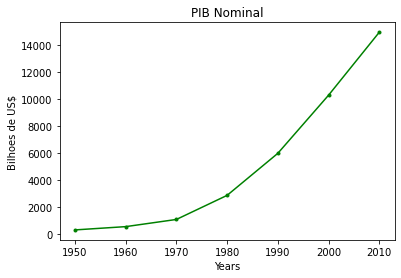

In [5]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='.', linestyle='solid')

# add a title
plt.title("PIB Nominal")

# add a label to the y-axis and x-axis
plt.xlabel("Years")
plt.ylabel("Bilhoes de US$")
plt.show()

## Gráfico de Barras

##### Um gráfico de barras é uma boa escolha quando você quer mostrar como alguma quantidade varia de algum conjunto discreto de itens.


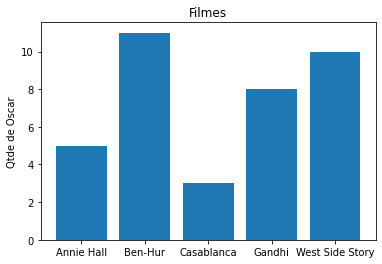

In [6]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# we'll add 0.1 to the left coordinates so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]

# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars)
plt.ylabel("Qtde de Oscar")
plt.title("Filmes")

# label x-axis with movie names at bar centers
plt.xticks([i + 0.1 for i, _ in enumerate(movies)], movies)
plt.show()


##### Um gráfico de barras também pode ser uma boa opção para traçar histogramas de valores numéricos agrupados, a fim de explorar visualmente como os valores são distribuídos.

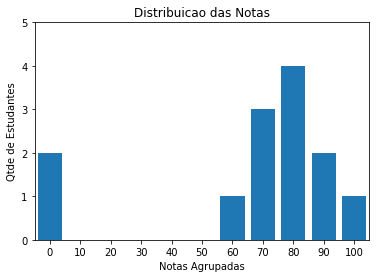

In [7]:
from collections import Counter

grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: (grade // 10) * 10
histogram = Counter(decile(grade) for grade in grades)

plt.bar([x for x in histogram.keys()],
  histogram.values(), # give each bar its correct height  
  8) # give each bar a width of 8

plt.axis([-5, 105, 0, 5]) # x-axis from -5 to 105,

# y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)]) # x-axis labels at 0, 10, ..., 100
plt.xlabel("Notas Agrupadas")
plt.ylabel("Qtde de Estudantes")
plt.title("Distribuicao das Notas")
plt.show()


##### Seja criterioso ao usar plt.axis(). Ao criar gráficos de barras, é considerada uma forma especialmente ruim não começar os eixos em 0, uma vez que esta é uma maneira fácil de enganar as pessoas

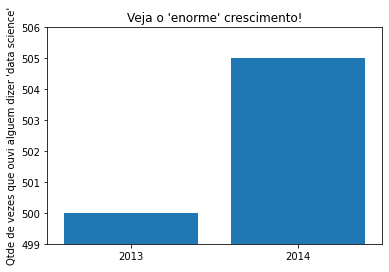

In [8]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("Qtde de vezes que ouvi alguem dizer 'data science'")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,499,506])
plt.title("Veja o 'enorme' crescimento!")
plt.show()

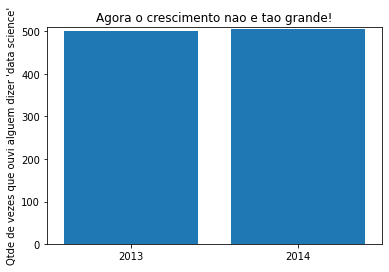

In [9]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("Qtde de vezes que ouvi alguem dizer 'data science'")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,0,510])
plt.title("Agora o crescimento nao e tao grande!")
plt.show()


## Gráfico de Linhas


##### Como já vimos, podemos fazer gráficos de linha usando plt.plot(). Estas são uma boa escolha para mostrar tendências.

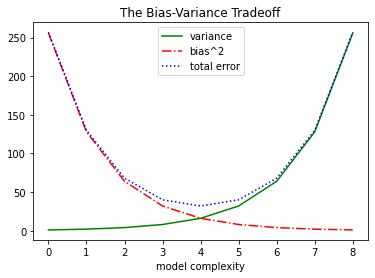

In [10]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# we can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance, 'g-', label='variance') # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2') # red dot-dashed line
plt.plot(xs, total_error, 'b:', label='total error') # blue dotted line

# because we've assigned labels to each series
# we can get a legend for free
# loc=9 means "top center"
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

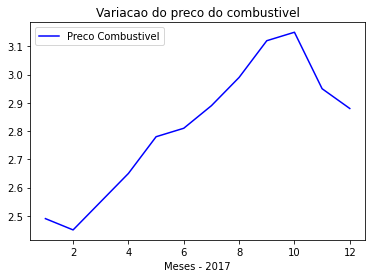

In [11]:
precos = [2.49, 2.45, 2.55, 2.65, 2.78, 2.81, 2.89,
  2.99, 3.12, 3.15, 2.95, 2.88]
xl = [i+1 for i, _ in enumerate(precos)]

plt.plot(xl, precos, 'b-', label='Preco Combustivel')
plt.xlabel("Meses - 2017")
plt.title("Variacao do preco do combustivel")
plt.legend(loc=2)
plt.show()

## Gráficos de Dispersão (Scatterplots)


##### Um diagrama de dispersão é a escolha certa para visualizar a relação entre dois conjuntos de dados correlacionados. Por exemplo, o gráfico abaixo ilustra o relacionamento entre o número de amigos que seus usuários possuem eo número de minutos que eles gastam no site todos os dias

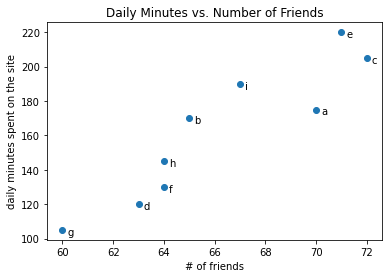

In [12]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
  plt.annotate(label,
  xy=(friend_count, minute_count), # put the label with its point
  xytext=(5, -5), # but slightly offset
  textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()


##### Se você estiver espalhando variáveis comparáveis, você pode obter uma imagem enganosa se você deixar Matplotlib escolher a escala

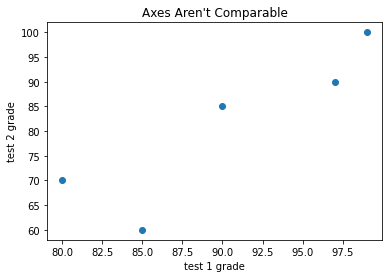

In [13]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

##### Se incluímos uma chamada para plt.axis ("igual"), o gráfico mostrará com mais precisão que a maior parte da variação das notas ocorrem na Avaliação 2 e não na Avaliação 1, como sugere o gráfico anterior.


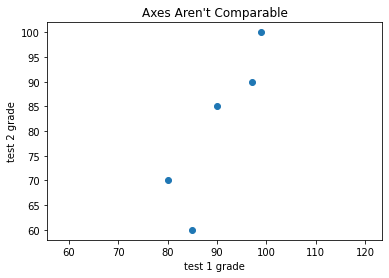

In [14]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.axis("equal")
plt.show()